In [1]:
%matplotlib notebook
# Show variation of success vs time spent taking the driver's test
# as it changes from week to week, or some other period.
# The passing rate is averaged over bins of time when the test was taken.
# The rate is calculated for values  > changept

import dmv_test_input as dti
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplcursors
from itertools import cycle

In [2]:
# Read test logs from alts database
df = dti.read_dmv_log(case=2)
df["passed"]  = (df.Result=="P")

# Calculate the rate after the change point
changept = 14.5
df = df[ (df.duration >= changept ) & (df.duration <= 40) ].reset_index()

Original length of sample data is 179142
2862 tests with Result, IPAddress, TotalScore = NaN dropped
Extra ip address dropped in 1183 tests


<IPython.core.display.Javascript object>


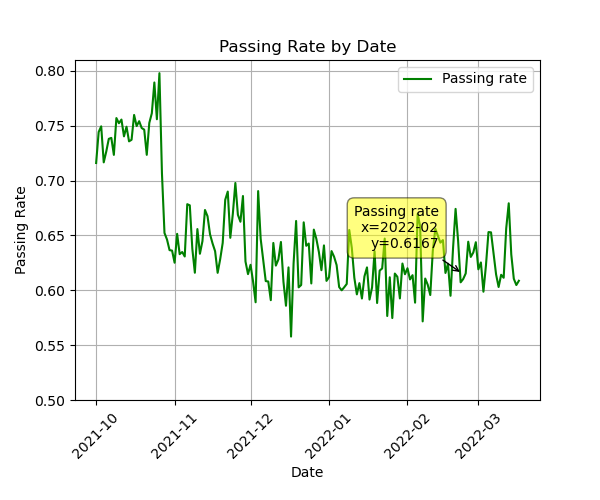

In [3]:
def plot_passing_rate(pf):
    linestyle = cycle(["-", "--"])
    color = cycle(['green', 'red'])
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.plot(pf.period, 
             pf['rate'],  #"o",
             color=next(color),
             linestyle=next(linestyle), 
             label="Passing rate")
    mplcursors.cursor(hover=True)
    ax.set_title(f"Passing Rate by Date")
    ax.set_xlabel(f"Date")
    ax.set_ylabel(f"Passing Rate")
    ax.tick_params(axis='x', rotation=45)
    fig.subplots_adjust(bottom=.2)
    ax.set_ylim(bottom=.5)
    ax.legend()
    plt.grid(visible=True)
    plt.show() 

def main():
    
    lo = '11/24/2021'
    hi = '11/30/2021'
    lotest = df.TestStartDateTime >= lo
    hitest =  df.TestStartDateTime <= hi
    # A very neat routine which groups all the events by day (or week)
    # into bins of a dataframe. There the grouped data can be manipulated.
    pf = df.resample('D', on='TestStartDateTime').passed.agg([sum,len]).reset_index()
    pf.columns=['period', 'p', 'n']
    pf['rate'] = pf.apply(lambda x: x.p/x.n if x.n != 0 else 0, axis=1)
    
    plot_passing_rate(pf)
    
    return df, pf

if __name__ == '__main__':
    
    df, pf = main()


In [4]:
pf.rate[pf.period>='2021-10-27'].mean()


0.6290414868312602